In [12]:
#Imports
import sys
sys.path.append("../")
import numpy
import matplotlib
from tensorflow import keras
from classes import ModelWrapper, DataLoader, Cluster, Plotting

#Interactive matplotlib plots
%matplotlib widget

In [8]:
#Initialisation
#modelAPI = ModelWrapper(keras.models.load_model("../models/3D/base_with_waveforms/"), "base",0.4)
modelAPI = ModelWrapper.loadPostprocessed("../models/3D/long_dropout", "base")
track_type = "alltracks"
data_loader = DataLoader("../data")
noisy = data_loader.getBatch(True, True, track_type=track_type, normalising=True)
noisy_with_E = data_loader.getBatch(True, True, track_type=track_type, normalising=False)
clean = data_loader.getBatch(True,False, track_type=track_type)
classified = modelAPI.classify( modelAPI.evaluateBatch(noisy) )
good_NN = Cluster.getGoodFromDataset(classified, noisy_with_E)
names = data_loader.getX17Names(track_type)

cmap = matplotlib.pyplot.get_cmap("Greys")
cmap.set_under('cyan')
eps = 1e-8

21/21 [==============================] - 6s 261ms/step


/home/gajdoma6/UTEF/track_denoiser/notebooks/../classes.py:237: RuntimeWarning: invalid value encountered in double_scalars
  self.energy_density = self.energy / self.effective_length


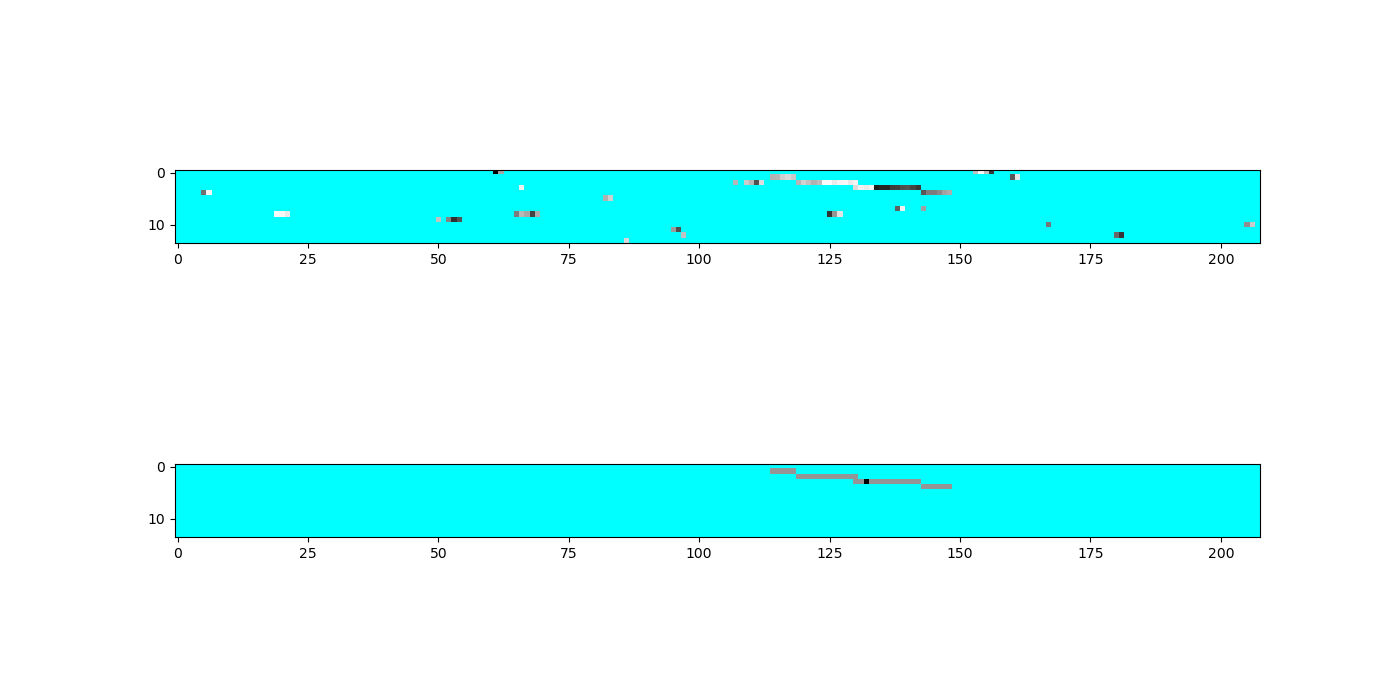

In [9]:
#View generated data
events = data_loader.getBatch(False, True, 3, normalising=False)
clean_events = data_loader.getBatch(False, False, 3, normalising=False)
index = numpy.random.randint(0, events.shape[0])

fig = matplotlib.pyplot.gcf()
matplotlib.pyplot.close(fig)

fig, ax = matplotlib.pyplot.subplots(2)
ax[0].imshow(numpy.sum(events[index],0), cmap, vmin=eps)
ax[1].imshow(numpy.sum(clean_events[index],0), cmap, vmin=eps)
fig.set_size_inches(14, 7)
matplotlib.pyplot.show()

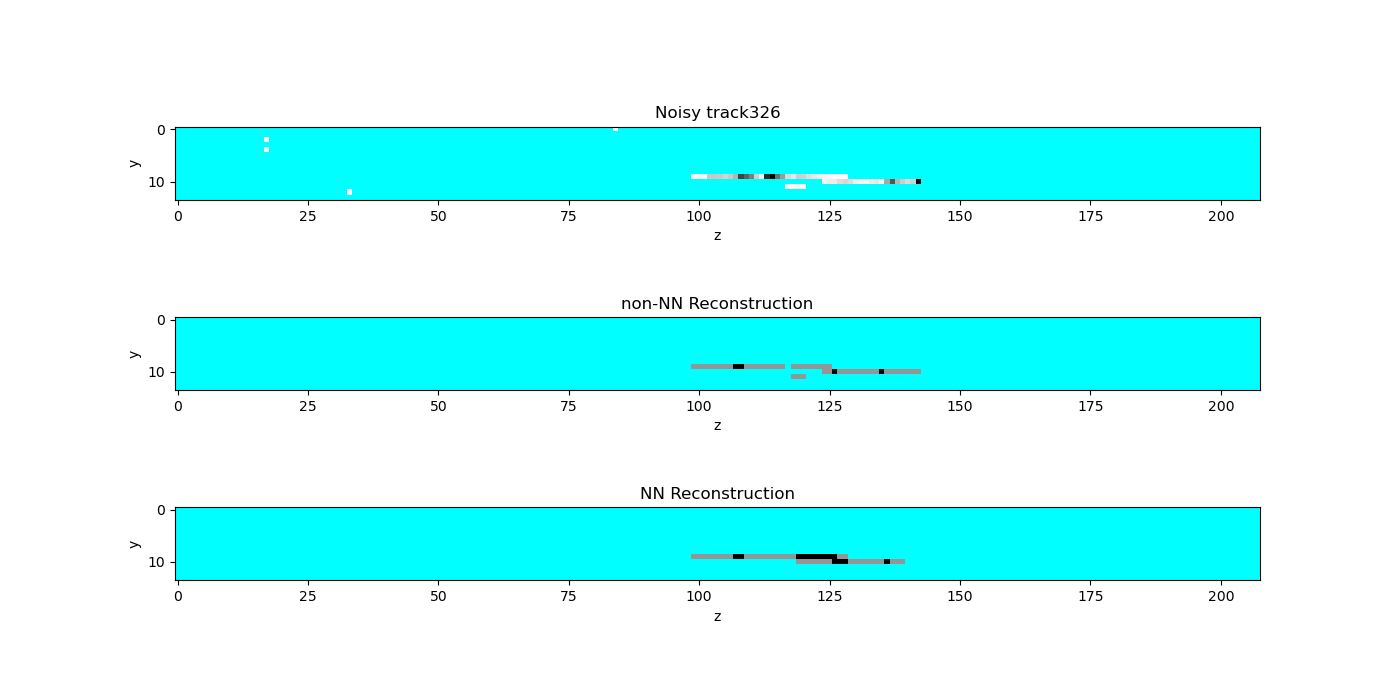

No such comm: 5c5f7f707ece48f3a48c4537b61e9aa1
No such comm: 5c5f7f707ece48f3a48c4537b61e9aa1


In [10]:
#View projected comparison specified by name
event_name = "track326"
axis = 0
event_noise = data_loader.getEventFromName(event_name, noisy=True, normalising=True)
event_nonNN = data_loader.getEventFromName(event_name, noisy=False)
event_NN = modelAPI.classify( modelAPI.evaluateSingleEvent(event_noise) )

fig = matplotlib.pyplot.gcf()
matplotlib.pyplot.close(fig)
Plotting.getPlotEventOneAxis(event_noise, numpy.where(event_nonNN>0,1,0), event_NN, axis, event_name, cmap="Greys")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 7)


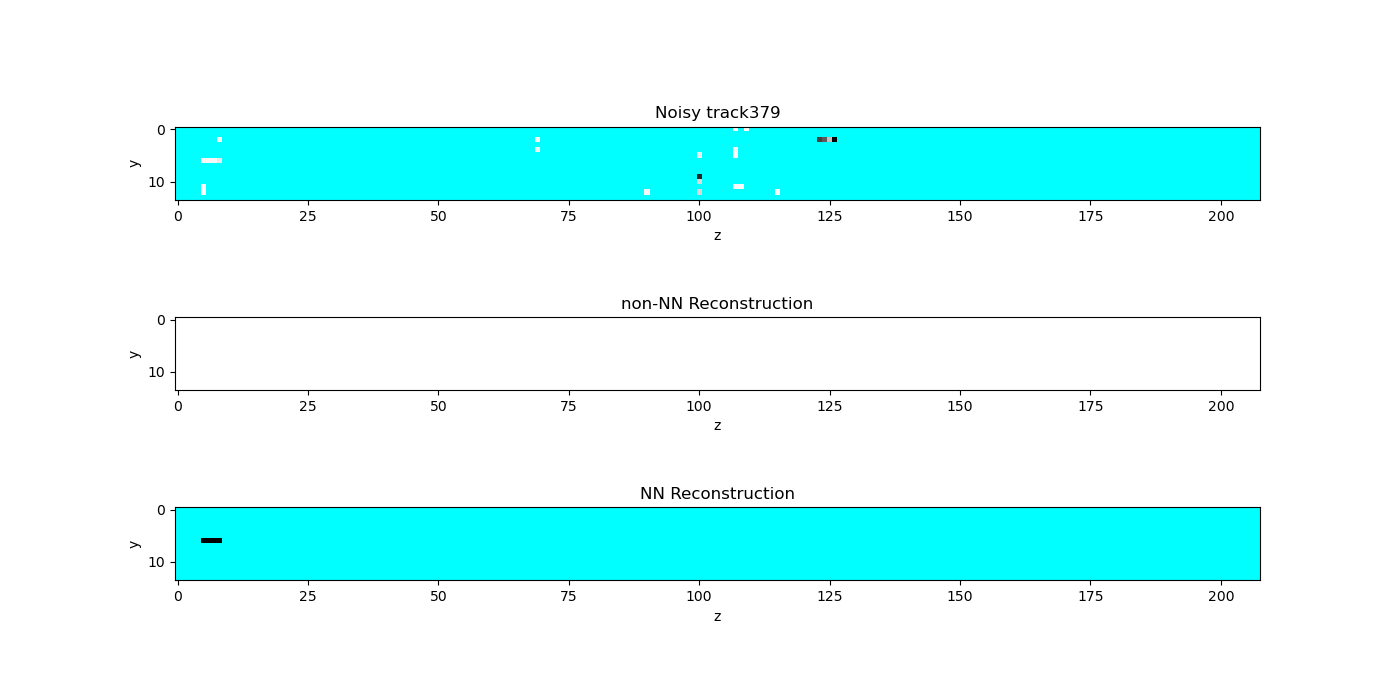

No such comm: 0ea5394c2aad4078823c94d5dbff3acb


No such comm: 1dcf171babf34dc7a481c9ba924b8827


In [ ]:
#View random projected comparison
axis = 0
index = numpy.random.randint(0, noisy.shape[0])

fig = matplotlib.pyplot.gcf()
matplotlib.pyplot.close(fig)
Plotting.getPlotEventOneAxis(noisy[index], numpy.where(clean[index]>0,1,0), classified[index], axis, names[index])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 7)

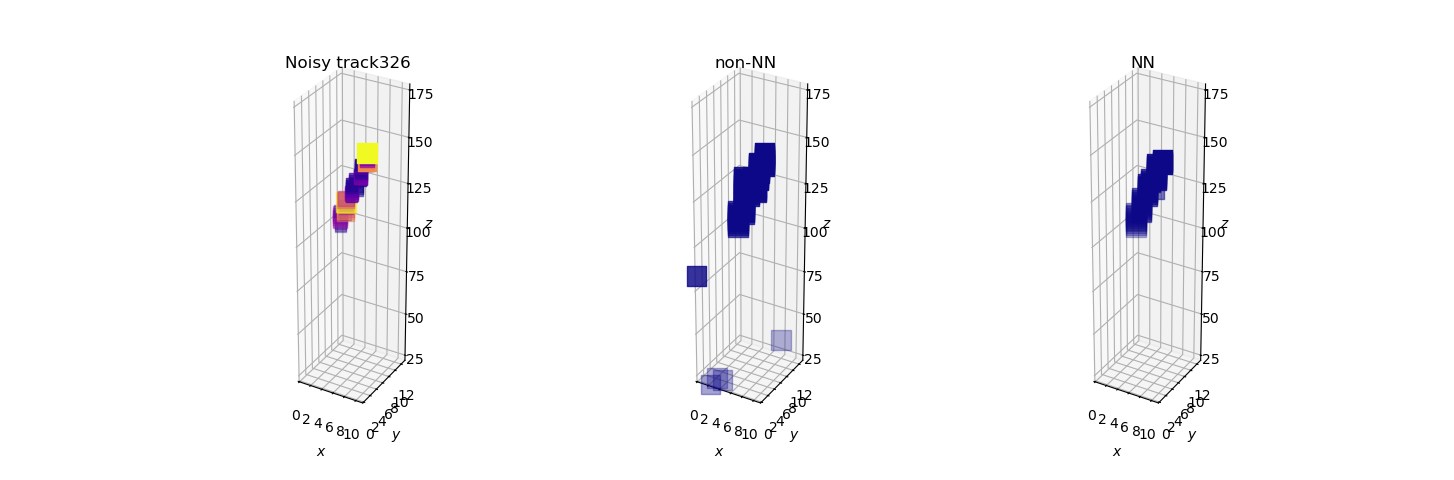

In [ ]:
#View 3D comparison specified by name
event_name = "track326"
axis = 0
event_noise = data_loader.getEventFromName(event_name, noisy=False, normalising=True)
event_nonNN = data_loader.getEventFromName(event_name, noisy=True)
event_NN = modelAPI.classify( modelAPI.evaluateSingleEvent(event_noise) )

fig = matplotlib.pyplot.figure(figsize=matplotlib.pyplot.figaspect(0.33))
axes = [fig.add_subplot(1, 3, k+1, projection='3d') for k in [0,1,2]]
Plotting.plot3DToAxis(event_noise, axes[0], "Noisy " + event_name, z_cut=(25,175))
Plotting.plot3DToAxis(numpy.where(event_nonNN>0,1,0), axes[1], "non-NN", z_cut=(25,175))
Plotting.plot3DToAxis(event_NN, axes[2], "NN", z_cut=(25,175))

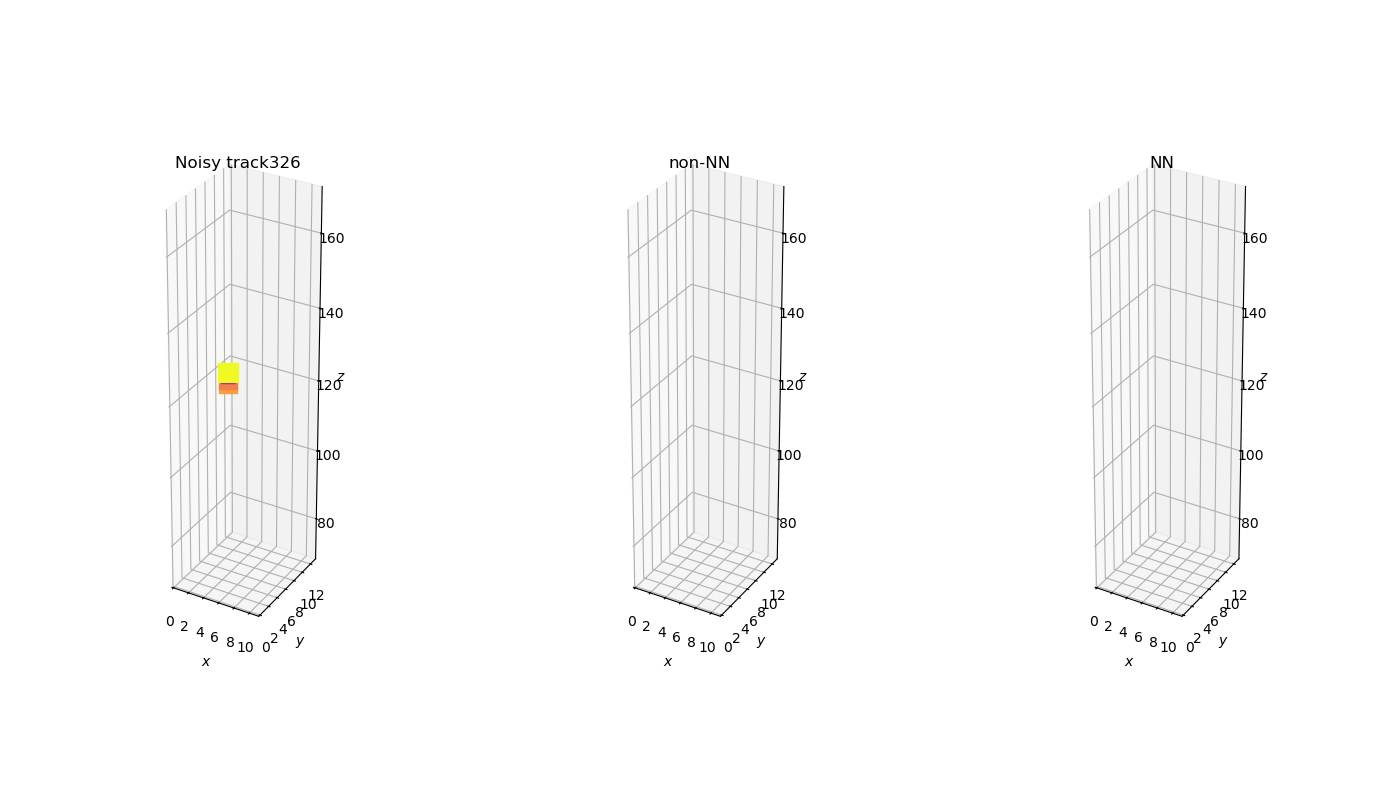

In [ ]:
#View random 3D comparison
index = numpy.random.randint(0, noisy.shape[0])

fig = matplotlib.pyplot.figure(figsize=matplotlib.pyplot.figaspect(0.33))
axes = [fig.add_subplot(1, 3, k+1, projection='3d') for k in [0,1,2]]
Plotting.plot3DToAxis(noisy[index], axes[0], "Noisy " + event_name, z_cut=(70,170))
Plotting.plot3DToAxis(numpy.where(clean[index]>0,1,0), axes[1], "non-NN", scaleSize=lambda x: 75, z_cut=(70,170))
Plotting.plot3DToAxis(classified[index], axes[2], "NN", scaleSize=lambda x: 75, z_cut=(70,170))
fig.set_size_inches(14,8)
fig.tight_layout()

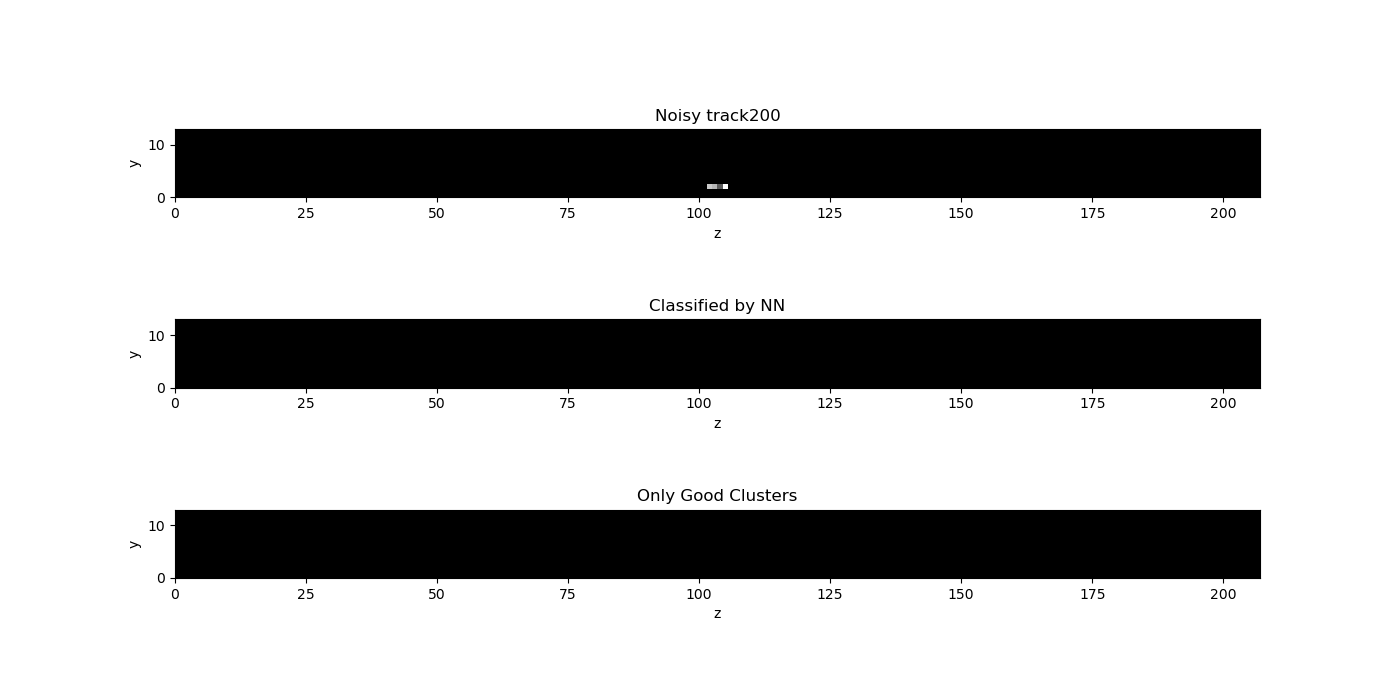

In [ ]:
#View random projected NN classification with good flag included
axis = 0
index = numpy.random.randint(0, noisy.shape[0])

x_labels = ['z', 'z', 'y']
y_labels = ['y', 'x', 'x']
axis_ranges = {'x': 11, 'y': 13, 'z': 207}

fig, ax = matplotlib.pyplot.subplots(3)
ax[0].imshow(numpy.sum(noisy[index], axis), "gray")
ax[0].set_title("Noisy " + names[index])
ax[1].imshow(numpy.sum(classified[index], axis), "gray")
ax[1].set_title("Classified by NN")
ax[2].imshow(numpy.sum(good_NN[index], axis), "gray")
ax[2].set_title("Only Good Clusters")
for i in range(3):
	ax[i].set_xlabel(x_labels[axis])
	ax[i].set_xlim(0, axis_ranges[x_labels[axis]])
	ax[i].set_ylabel(y_labels[axis])
	ax[i].set_ylim(0, axis_ranges[y_labels[axis]])
fig.set_size_inches(14, 7)
matplotlib.pyplot.show()


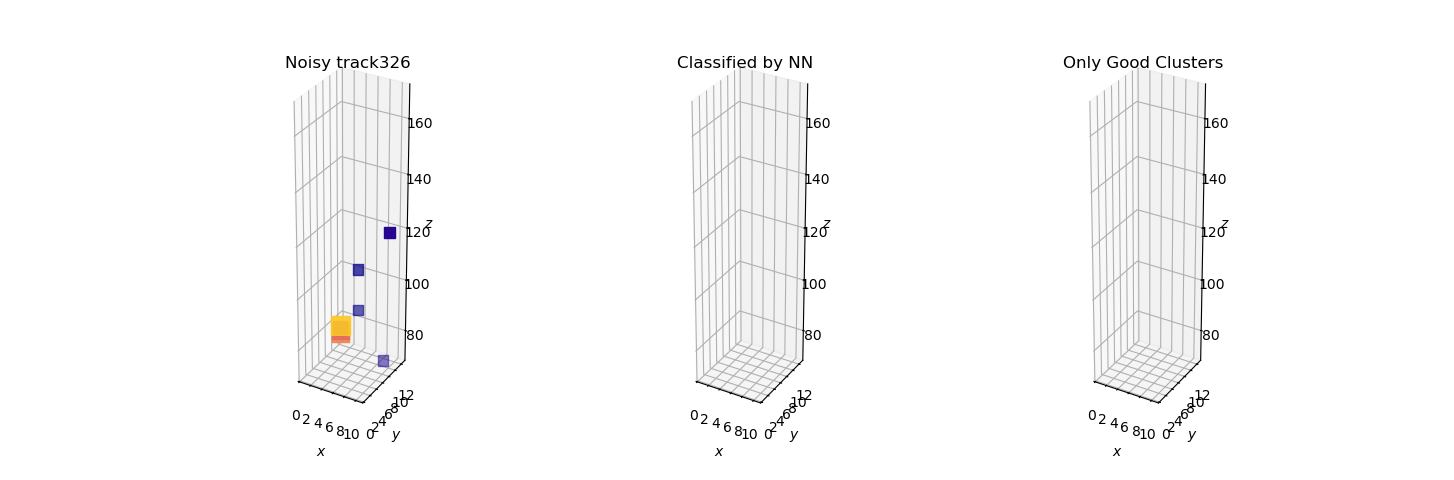

In [ ]:
#View random projected NN classification with good flag included
index = numpy.random.randint(0, noisy.shape[0])

fig = matplotlib.pyplot.figure(figsize=matplotlib.pyplot.figaspect(0.33))
axes = [fig.add_subplot(1, 3, k+1, projection='3d') for k in [0,1,2]]
Plotting.plot3DToAxis(noisy[index], axes[0], "Noisy " + event_name, z_cut=(70,170))
Plotting.plot3DToAxis(classified[index], axes[1], "Classified by NN", z_cut=(70,170))
Plotting.plot3DToAxis(good_NN[index], axes[2], "Only Good Clusters", z_cut=(70,170))

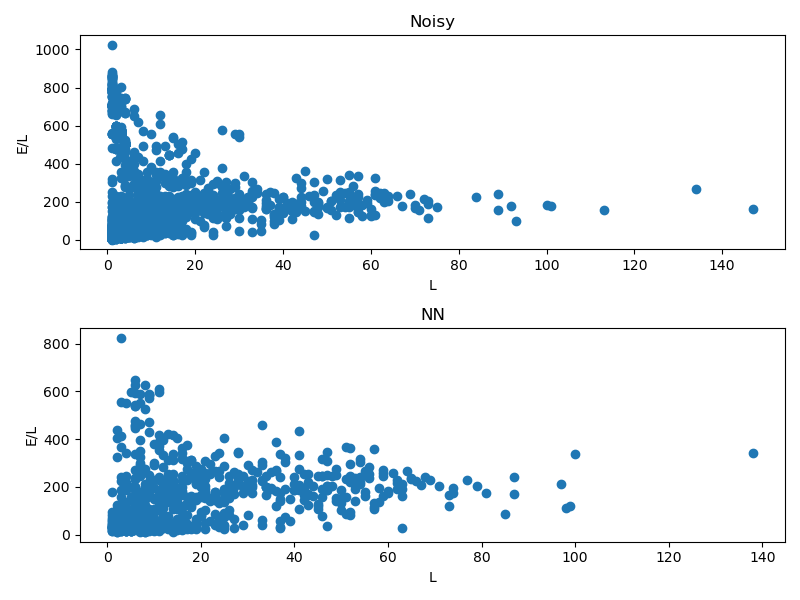

In [21]:
#2D scatter cuts parameters
paramX = lambda cluster:	cluster.length
paramY = lambda cluster:	cluster.energy_density
name_x = "L"
name_y = "E/L"

fig = matplotlib.pyplot.gcf()
matplotlib.pyplot.close(fig)
fig, ax = matplotlib.pyplot.subplots(2)

data = [noisy, classified]
for axis in range(2):
	xs = []
	ys = []
	for i in range(classified.shape[0]):
		for cluster in Cluster.clusterise(data[axis][i]):
			cluster.setEnergy(noisy_with_E[i])
			xs.append(paramX(cluster))
			ys.append(paramY(cluster))

	ax[axis].scatter(xs, ys, marker=".")
	ax[axis].set_title("Noisy" if axis == 0 else "NN")
	ax[axis].set_xlabel(name_x)
	ax[axis].set_ylabel(name_y)

fig.set_size_inches(8, 6)
fig.tight_layout()
matplotlib.pyplot.show()